In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action= "ignore")

#                                                  Reggression Project (2)
 
 

## Contents
1.  Introduction
2.  The Aim of Analysis
3.  General Information of the Data
4.  Arrangements of the Data Sets
5.  Filling of the Row Data 
6.  Data Exploration 
7.  Splitting the Data
8.  Training the Model
9.  Predicting the Model
10. Evaluating the Model
11. Conclusions

**1. Introduction**

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

**2. The Aim of Analysis**

This study aims to search for the elements which effects life expectancy by using correlations with regression models.

**3. General Information of the Data**

Country : Country

Year : Year 

Status : Developed or Developing status

Life expectancy : Life Expectancy in age

Adult Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

infant deaths : Number of Infant Deaths per 1000 population


Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

percentage:  expenditureExpenditure on health as a percentage of Gross Domestic Product per capita(%)

Hepatitis B : Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

Measles : Measles - number of reported cases per 1000 population

BMI : Average Body Mass Index of entire population

under-five deaths : Number of under-five deaths per 1000 population

Polio : Polio (Pol3) immunization coverage among 1-year-olds (%)

Total expenditure : General government expenditure on health as a percentage of total government expenditure (%)

Diphtheria :  Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

HIV/AIDS : Deaths per 1 000 live births HIV/AIDS (0-4 years)

GDP : Gross Domestic Product per capita (in USD)

Population : Population of the country

thinness 1-19 years : Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

Income composition of resources : Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

Schooling : Number of years of Schooling(years)

**4. Data Exploration**

In [2]:
LifeExpectancyData = pd.read_csv('data/LifeExpectancyData.csv')
LifeExpectancyData.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,...,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,...,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,...,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,...,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,...,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500


In [3]:
LifeExpectancyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [4]:
LifeExpectancyData.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

We have a lot of missing population values in  many countries. We alsa have GDP values from population for each countries as well. Therefore, I preferred to drop coloumn from data frame.

In [5]:
LifeExpectancyData.columns 

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
LifeExpectancyData.columns= ['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP','Population', 'thinness_1_19_years', 'thinness_5_9_years',
       'Income_composition_of_resources', 'Schooling']

In [7]:
bos_hucre_toplam = LifeExpectancyData.isnull().sum()
bos_hucre_yuzde = LifeExpectancyData.isnull().sum()/LifeExpectancyData.isnull().count()
bos_degerler = pd.concat([bos_hucre_toplam, bos_hucre_yuzde], axis=1, keys=['bos_toplam', 'bos_yuzde'])
bos_degerler = bos_degerler.sort_values('bos_toplam', ascending=False)

In [8]:
def bos_hucre(LifeExpectancyData):
    bos_hucre_toplam = LifeExpectancyData.isnull().sum()
    bos_hucre_yuzde = LifeExpectancyData.isnull().sum()/LifeExpectancyData.isnull().count()
    bos_degerler = pd.concat([bos_hucre_toplam, bos_hucre_yuzde], axis=1, keys=['bos_toplam', 'bos_yuzde'])
    bos_degerler = bos_degerler.sort_values('bos_toplam', ascending=False)
    return bos_degerler[bos_degerler['bos_toplam'] > 0]

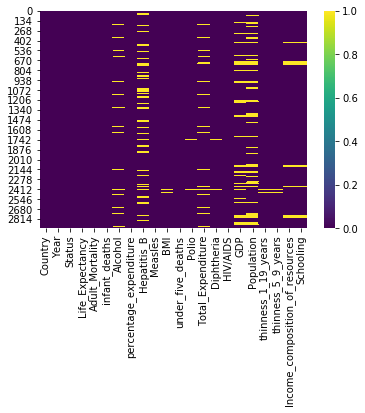

In [9]:
sns.heatmap(LifeExpectancyData.isnull(),cmap='viridis')

**4.a. Importing an Extarnel Data Frame**

***Further steps requires extra tools to compare and to group row data for cleaning and filling Null values. Therefore, I imported another data frame with neccessary columns.**

In [10]:
regions = pd.read_csv('./data/all.csv')

In [11]:
regions.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.000,34.000,nan
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.000,154.000,nan
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.000,39.000,nan
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.000,15.000,nan
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.000,61.000,nan


In [12]:
regions[['name', 'region', 'sub-region']].isnull().sum()

name          0
region        1
sub-region    1
dtype: int64

In [13]:
regions.columns

Index(['name', 'alpha-2', 'alpha-3', 'country-code', 'iso_3166-2', 'region',
       'sub-region', 'intermediate-region', 'region-code', 'sub-region-code',
       'intermediate-region-code'],
      dtype='object')

**4.b. Merging two data frame in one, LifeExpectancyData_merged, will help us to fill in accurately.**

In [14]:
LifeExpectancyData_merged = pd.merge(LifeExpectancyData, regions[['name', 'region', 'sub-region']], left_on='Country', right_on='name')

In [15]:
bos_hucre(LifeExpectancyData_merged)

,bos_toplam,bos_yuzde
Population,556,0.197
Hepatitis_B,536,0.190
GDP,352,0.125
Total_Expenditure,204,0.072
Alcohol,187,0.066
Income_composition_of_resources,87,0.031
Schooling,83,0.029
BMI,34,0.012
thinness_5_9_years,34,0.012
thinness_1_19_years,34,0.012


In [16]:
LifeExpectancyData_merged.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,HIV/AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,name,region,sub-region
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,...,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100,Afghanistan,Asia,Southern Asia
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,...,0.100,612.697,327582.000,17.500,17.500,0.476,10.000,Afghanistan,Asia,Southern Asia
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,...,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900,Afghanistan,Asia,Southern Asia
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,...,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800,Afghanistan,Asia,Southern Asia
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,...,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500,Afghanistan,Asia,Southern Asia


**5. Cleaning of the Row Data**

There is a high number of Null values on Population column. We already have GDP values on each countries so I prefered to drop it.

In [17]:
LifeExpectancyData_merged.drop('Population', inplace=True, axis=1)

In [18]:
LifeExpectancyData_merged.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'thinness_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling',
       'name', 'region', 'sub-region'],
      dtype='object')

In [19]:
fill_list = (bos_hucre(LifeExpectancyData_merged)).index

In [20]:
bos_hucre(LifeExpectancyData_merged)

,bos_toplam,bos_yuzde
Hepatitis_B,536,0.190
GDP,352,0.125
Total_Expenditure,204,0.072
Alcohol,187,0.066
Income_composition_of_resources,87,0.031
Schooling,83,0.029
BMI,34,0.012
thinness_5_9_years,34,0.012
thinness_1_19_years,34,0.012
Polio,19,0.007


**5. Filling of the Row Data**

In [21]:
df_interpolate = LifeExpectancyData_merged.copy()

for col in fill_list:
    df_interpolate[col] = df_interpolate.groupby(['Country'])[col].transform(lambda x: x.interpolate(limit_direction = 'both'))

In [22]:
bos_hucre(df_interpolate)

,bos_toplam,bos_yuzde
GDP,309,0.109
Hepatitis_B,144,0.051
Income_composition_of_resources,87,0.031
Schooling,83,0.029
BMI,34,0.012
thinness_5_9_years,34,0.012
thinness_1_19_years,34,0.012
Alcohol,17,0.006
Total_Expenditure,16,0.006
Life_Expectancy,10,0.004


****Applying Interpolate on both direction with grouping by Country, does not help on missing values of Total_Expenditure and Alcohol  as there is no information on related countries. Thus, I used interpolte method with grouping by sub-region and Year columns.***

In [23]:
for col in fill_list:
    df_interpolate[col] = df_interpolate.groupby(['sub-region', 'Year'])[col].transform(lambda x: x.interpolate(limit_direction='both'))

In [24]:
bos_hucre(df_interpolate)

,bos_toplam,bos_yuzde


**8.Training the Model**

In [25]:
LifeExpectancyData_num = df_interpolate._get_numeric_data() 

In [26]:
corr_matrix = LifeExpectancyData_num.corr()
corr_list = corr_matrix.Life_Expectancy.abs().sort_values(ascending=False).index[1:]
corr_list

Index(['Schooling', 'Income_composition_of_resources', 'Adult_Mortality',
       'HIV/AIDS', 'BMI', 'Diphtheria', 'thinness_1_19_years',
       'thinness_5_9_years', 'Polio', 'GDP', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'Total_Expenditure',
       'under_five_deaths', 'infant_deaths', 'Year', 'Measles'],
      dtype='object')

In [27]:
y_allValues = LifeExpectancyData_num['Life_Expectancy']
X_allValues = LifeExpectancyData_num[corr_list]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_allValues, y_allValues, test_size = 0.2, random_state = 500)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 2260
Test kümesindeki gözlem sayısı   : 566


In [29]:
X_train = sm.add_constant(X_train)

tum_degiskenli_model = sm.OLS(y_train, X_train).fit()

tum_degiskenli_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     613.6
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        23:23:36   Log-Likelihood:                -6257.8
No. Observations:                2260   AIC:                         1.255e+04
Df Residuals:                    2241   BIC:                         1.266e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             146.6938     39.098      3.752      0.000      70.021     223.366
Schooling                           0.7519      0.047     16.167      0.000       0.661       0.843
Income_composition_of_resources     7.4097      0.693     10.699      0.000       6.052       8.768
Adult_Mortality                    -0.0172      0.001    -18.633      0.000      -0.019      -0.015
HIV/AIDS                           -0.5359      0.024    -22.697      0.000      -0.582      -0.490
BMI                                 0.0425      0.006      7.702      0.000       0.032       0.053
Diphtheria                          0.0256      0.005      4.812      0.000       0.015       0.036
thinness_1_19_years                -0.0700      0.053     -1.321      0.187      -0.174       0.034
thinness_5_9_years                 -0.0004      0.052     -0.007      0.994      -0.103       0.102
Polio                               0.0229      0.005      4.561      0.000       0.013       0.033
GDP                              2.635e-05   1.13e-05      2.326      0.020    4.13e-06    4.86e-05
Alcohol                             0.0430      0.026      1.633      0.103      -0.009       0.095
percentage_expenditure              0.0002   7.65e-05      2.928      0.003     7.4e-05       0.000
Hepatitis_B                        -0.0008      0.004     -0.225      0.822      -0.008       0.006
Total_Expenditure                   0.0345      0.035      0.993      0.321      -0.034       0.103
under_five_deaths                  -0.0699      0.006    -10.891      0.000      -0.083      -0.057
infant_deaths                       0.0937      0.009     10.779      0.000       0.077       0.111
Year                               -0.0465      0.020     -2.376      0.018      -0.085      -0.008
Measles                         -1.442e-05   9.25e-06     -1.558      0.119   -3.26e-05    3.73e-06
==============================================================================
Omnibus:                      146.101   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              665.175
Skew:                           0.026   Prob(JB):                    3.62e-145
Kurtosis:                       5.657   Cond. No.                     7.79e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
from matplotlib import style
style.use('fivethirtyeight')

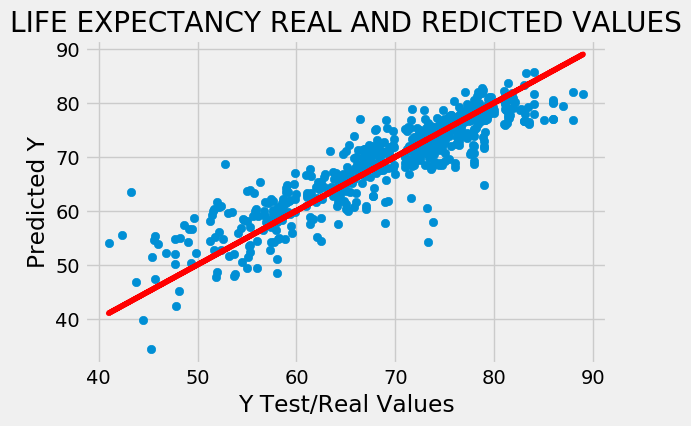

In [31]:
X_test = sm.add_constant(X_test)

y_preds = tum_degiskenli_model.predict(X_test)

plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Y Test/Real Values")
plt.ylabel("Predicted Y")
plt.title("LIFE EXPECTANCY REAL AND REDICTED VALUES")
plt.show()

In [32]:
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Ortalama Mutlak Hata (MAE)        : 3.139625766498209
Ortalama Kare Hata (MSE)          : 17.682203150094185
Kök Ortalama Kare Hata (RMSE)     : 4.205021183073182
Ortalama Mutlak Yüzde Hata (MAPE) : 4.835593873167138


In [33]:
len(tum_degiskenli_model.pvalues)

19

In [34]:
pDegeri = tum_degiskenli_model.pvalues
anlamli_degerler = list(pDegeri[pDegeri<= 0.05].index)
anlamli_degerler

['const',
 'Schooling',
 'Income_composition_of_resources',
 'Adult_Mortality',
 'HIV/AIDS',
 'BMI',
 'Diphtheria',
 'Polio',
 'GDP',
 'percentage_expenditure',
 'under_five_deaths',
 'infant_deaths',
 'Year']

In [35]:
anlamli_degerler= anlamli_degerler[1:]

In [36]:
len(anlamli_degerler)

12

In [37]:
y_anlamli = LifeExpectancyData_num['Life_Expectancy'] 
X_anlamli = LifeExpectancyData_num[anlamli_degerler] 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_anlamli, y_anlamli, test_size = 0.2, random_state = 500)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 2260
Test kümesindeki gözlem sayısı   : 566


In [39]:
X_train = sm.add_constant(X_train)

anlamli_12degiskenli_model = sm.OLS(y_train, X_train).fit()
anlamli_12degiskenli_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     914.4
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        23:23:36   Log-Likelihood:                -6266.4
No. Observations:                2260   AIC:                         1.256e+04
Df Residuals:                    2247   BIC:                         1.263e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             165.6685     37.177      4.456      0.000      92.763     238.574
Schooling                           0.7975      0.044     18.098      0.000       0.711       0.884
Income_composition_of_resources     7.6033      0.691     11.005      0.000       6.248       8.958
Adult_Mortality                    -0.0170      0.001    -18.560      0.000      -0.019      -0.015
HIV/AIDS                           -0.5402      0.023    -23.015      0.000      -0.586      -0.494
BMI                                 0.0494      0.005      9.616      0.000       0.039       0.059
Diphtheria                          0.0255      0.005      5.109      0.000       0.016       0.035
Polio                               0.0224      0.005      4.489      0.000       0.013       0.032
GDP                              2.488e-05   1.13e-05      2.197      0.028    2.67e-06    4.71e-05
percentage_expenditure              0.0003    7.6e-05      3.392      0.001       0.000       0.000
under_five_deaths                  -0.0674      0.006    -10.694      0.000      -0.080      -0.055
infant_deaths                       0.0887      0.009     10.399      0.000       0.072       0.105
Year                               -0.0564      0.019     -3.036      0.002      -0.093      -0.020
==============================================================================
Omnibus:                      158.909   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              748.807
Skew:                           0.111   Prob(JB):                    2.50e-163
Kurtosis:                       5.811   Cond. No.                     7.39e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

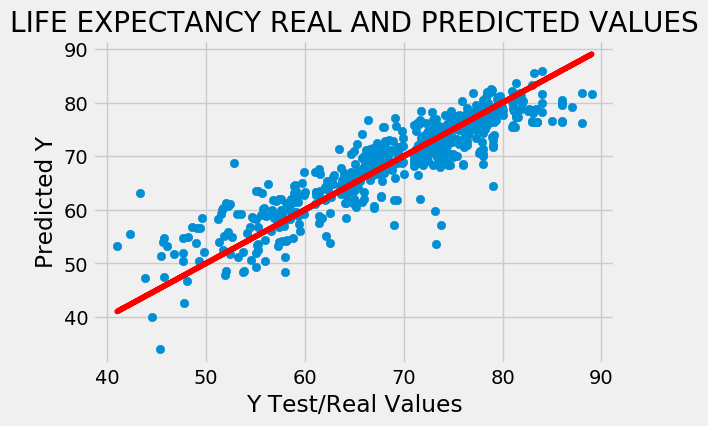

In [40]:
X_test = sm.add_constant(X_test)

y_preds = anlamli_12degiskenli_model.predict(X_test)

plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Y Test/Real Values")
plt.ylabel("Predicted Y")
plt.title("LIFE EXPECTANCY REAL AND PREDICTED VALUES")
plt.show()

In [41]:
print (tum_degiskenli_model.rsquared)
print (anlamli_12degiskenli_model.rsquared) 


0.8313145645747545
0.830025511192831


In [42]:
anlamli_12degiskenli_model.pvalues

const                             0.000
Schooling                         0.000
Income_composition_of_resources   0.000
Adult_Mortality                   0.000
HIV/AIDS                          0.000
BMI                               0.000
Diphtheria                        0.000
Polio                             0.000
GDP                               0.028
percentage_expenditure            0.001
under_five_deaths                 0.000
infant_deaths                     0.000
Year                              0.002
dtype: float64

In [43]:
anlamli_degerler

['Schooling',
 'Income_composition_of_resources',
 'Adult_Mortality',
 'HIV/AIDS',
 'BMI',
 'Diphtheria',
 'Polio',
 'GDP',
 'percentage_expenditure',
 'under_five_deaths',
 'infant_deaths',
 'Year']

anlamli_degerler listesinde artik sabit olmadigi icin devam edebiliriz.

In [44]:
X_arttirilmis_anlamli = LifeExpectancyData_num[anlamli_degerler[:10]]


In [45]:
len(anlamli_degerler[:10])

10

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_arttirilmis_anlamli, y_anlamli, test_size = 0.2, random_state = 500)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 2260
Test kümesindeki gözlem sayısı   : 566


In [47]:
X_artilirmis_anlamli = sm.add_constant(X_arttirilmis_anlamli)

anlamli_10degiskenli_model = sm.OLS(y_anlamli, X_arttirilmis_anlamli).fit()

anlamli_10degiskenli_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.486e+04
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        23:23:37   Log-Likelihood:                -10387.
No. Observations:                2826   AIC:                         2.079e+04
Df Residuals:                    2816   BIC:                         2.085e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Schooling                           2.3109      0.092     25.254      0.000       2.131       2.490
Income_composition_of_resources    15.7849      1.525     10.350      0.000      12.794      18.776
Adult_Mortality                     0.0359      0.002     21.609      0.000       0.033       0.039
HIV/AIDS                           -0.6964      0.050    -13.854      0.000      -0.795      -0.598
BMI                                 0.1001      0.011      9.073      0.000       0.078       0.122
Diphtheria                          0.1246      0.011     11.606      0.000       0.104       0.146
Polio                               0.1359      0.011     12.920      0.000       0.115       0.157
GDP                             -5.731e-05   2.54e-05     -2.255      0.024      -0.000   -7.47e-06
percentage_expenditure              0.0001      0.000      0.703      0.482      -0.000       0.000
under_five_deaths                   0.0113      0.001     10.079      0.000       0.009       0.014
==============================================================================
Omnibus:                      539.163   Durbin-Watson:                   0.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1645.105
Skew:                           0.972   Prob(JB):                         0.00
Kurtosis:                       6.192   Cond. No.                     1.36e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
X_test = sm.add_constant(X_test)

In [49]:
y_preds = anlamli_10degiskenli_model.predict(X_test)

plt.figure(dpi = 200)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Y Test/Real Values")
plt.ylabel("Predicted Y")
plt.title("LIFE EXPECTANCY REAL AND REDICTED VALUES")
plt.show()

ValueError: shapes (566,11) and (10,) not aligned: 11 (dim 1) != 10 (dim 0)

In [50]:
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))


Ortalama Mutlak Hata (MAE)        : 3.142005744458843
Ortalama Kare Hata (MSE)          : 17.758340161620623
Kök Ortalama Kare Hata (RMSE)     : 4.214064565430936
Ortalama Mutlak Yüzde Hata (MAPE) : 4.825156383902807


In [51]:
print (tum_degiskenli_model.rsquared)
print (anlamli_12degiskenli_model.rsquared)
print (anlamli_10degiskenli_model.rsquared)


0.8313145645747545
0.830025511192831
0.9814070330437532


In [52]:
anlamli_10degiskenli_model.pvalues

Schooling                         0.000
Income_composition_of_resources   0.000
Adult_Mortality                   0.000
HIV/AIDS                          0.000
BMI                               0.000
Diphtheria                        0.000
Polio                             0.000
GDP                               0.024
percentage_expenditure            0.482
under_five_deaths                 0.000
dtype: float64

In [53]:
X_daha_arttirilmis_anlamli = LifeExpectancyData_num[anlamli_degerler[:5]]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_daha_arttirilmis_anlamli, y_anlamli, test_size = 0.2, random_state = 500)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 2260
Test kümesindeki gözlem sayısı   : 566


In [55]:
X_daha_arttirilmis_anlamli = sm.add_constant(X_train)

anlamli_5degiskenli_model = sm.OLS(y_train, X_train).fit()

anlamli_5degiskenli_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 1.709e+04
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        23:24:17   Log-Likelihood:                -8675.2
No. Observations:                2260   AIC:                         1.736e+04
Df Residuals:                    2255   BIC:                         1.739e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Schooling                           3.4765      0.110     31.687      0.000       3.261       3.692
Income_composition_of_resources    21.8546      1.924     11.358      0.000      18.081      25.628
Adult_Mortality                     0.0555      0.002     27.583      0.000       0.052       0.059
HIV/AIDS                           -0.8977      0.067    -13.475      0.000      -1.028      -0.767
BMI                                 0.1064      0.015      7.266      0.000       0.078       0.135
==============================================================================
Omnibus:                      432.927   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1480.279
Skew:                           0.935   Prob(JB):                         0.00
Kurtosis:                       6.496   Cond. No.                     1.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
X_test = sm.add_constant(X_test)

y_preds = anlamli_5degiskenli_model.predict(X_test)

plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Test Y/Real Values")
plt.ylabel("Predicted Y")
plt.title("LIFE EXPECTANCY REAL AND PREDICTED VALUES")
plt.show()

ValueError: shapes (566,6) and (5,) not aligned: 6 (dim 1) != 5 (dim 0)

In [57]:
print (tum_degiskenli_model.rsquared)
print (anlamli_12degiskenli_model.rsquared)
print (anlamli_10degiskenli_model.rsquared)
print (anlamli_5degiskenli_model.rsquared)

0.8313145645747545
0.830025511192831
0.9814070330437532
0.9742909425066556


In [58]:
X_daha_arttirilmis_anlamli.head()

,const,Schooling,Income_composition_of_resources,Adult_Mortality,HIV/AIDS,BMI
2041,1.000,13.400,0.843,7.000,0.100,67.700
228,1.000,15.500,0.787,232.000,0.100,59.900
1069,1.000,7.700,0.000,38.000,5.000,19.600
1876,1.000,7.600,0.000,45.000,4.900,16.900
2274,1.000,14.300,0.793,138.000,0.100,53.700


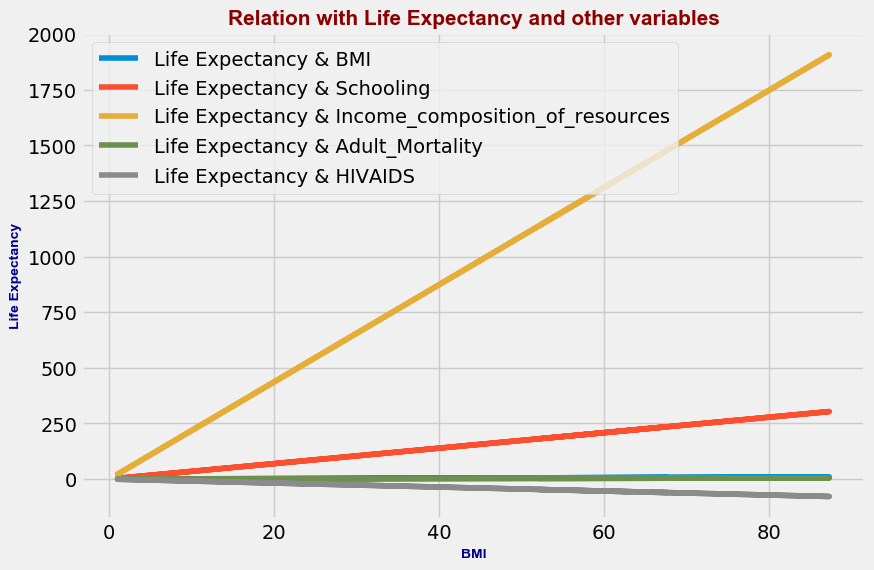

In [59]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(9,6), dpi = 100)

Life_Expectancy_BMI = X_daha_arttirilmis_anlamli.BMI * 0.1064
Life_Expectancy_Schooling = X_daha_arttirilmis_anlamli.BMI * 3.4765
Life_Expectancy_Income_composition_of_resources = X_daha_arttirilmis_anlamli.BMI * 21.8546
Life_Expectancy_Adult_Mortality = X_daha_arttirilmis_anlamli.BMI * 0.0555
Life_Expectancy_HIVAIDS = X_daha_arttirilmis_anlamli.BMI * (-0.8977)


plt.plot(X_daha_arttirilmis_anlamli.BMI, Life_Expectancy_BMI)
plt.plot(X_daha_arttirilmis_anlamli.BMI, Life_Expectancy_Schooling)
plt.plot(X_daha_arttirilmis_anlamli.BMI, Life_Expectancy_Income_composition_of_resources)
plt.plot(X_daha_arttirilmis_anlamli.BMI, Life_Expectancy_Adult_Mortality)
plt.plot(X_daha_arttirilmis_anlamli.BMI, Life_Expectancy_HIVAIDS)

plt.legend(["Life Expectancy & BMI", "Life Expectancy & Schooling", "Life Expectancy & Income_composition_of_resources", "Life Expectancy & Adult_Mortality", "Life Expectancy & HIVAIDS"])
plt.xlabel("BMI", fontdict=eksen_font)
plt.ylabel("Life Expectancy", fontdict=eksen_font)
plt.title("Relation with Life Expectancy and other variables", fontdict=baslik_font)

plt.show()